# Part 1)
This is the code in the question:

In [1]:
struct Point
{
    double x;
    double y;
    Point(double _x = 0.0, double _y = 0.0)
    {
        x = _x;
        y = _y;   
    }
    Point operator-(Point p)
    {
       return Point(x - p.x,y - p.y);
    }
};

struct Line_Segment
{
    Point a;
    Point b;
    Line_Segment(Point _a, Point _b)
    {
        a = _a;
        b = _b;
    }
    double anon(Line_Segment other)
    {
        Point c = b - a;
        Point d = other.b - other.a;
        return c.x * d.y - d.x*c.y;
    }
};

Now to test out $\verb|anon|$ with an example.

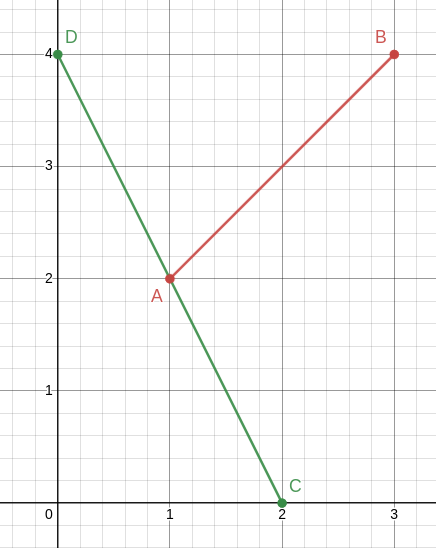

In [2]:
#include <iostream>

In [3]:
Point A(1,2);
Point B(3,4);
Point C(2,0);
Point D(0,4);
Line_Segment L1(A,B);
Line_Segment L2(C,D);
std::cout << L1.anon(L2) << std::endl;

12


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f8c767fd540


The function $\verb|anon|$ takes two line segments (aka four points) and calculates the cross product. It does this by calculating the vector form of each line (by subtracting one end from the other) and then calculating the cross product.
A cross product in 2D space returns a scalar value. This is beacuse it is like the usual 3D cross product but assuming the $z=0$ for both vectors (i.e. you are in the plane at $z=0$). Then if you were to do the cross poduct of the 3D vectors for example: $$ \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} \times \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} x_1 \\ y_1 \\ 0 \end{pmatrix} \times \begin{pmatrix} x_2 \\ y_2 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ x_1y_2-x_2y_1\end{pmatrix}$$
The cross product of the 2D vector outputting a scalar value is just skipping the stuff we know are going to be zeros. Therefore this scalar value is the size of the vector perpendicular to the plane coming out of the origin $(0,0)$.

It can also be used to caluclate the angle between the two lines using the sine rule: $$ a \times b = |a| \cdot |b| \sin(\theta).$$ As it is a the sine rule it always finds the 'smaller' angle in terms of two intersecting lines. So for the example above...

In [4]:
#include <math.h>

In [5]:
Point P1 {B-A};
Point P2 {D-C};
double l1 {std::sqrt(std::pow(P1.x,2)+std::pow(P1.y,2))};
double l2 {std::sqrt(std::pow(P2.x,2)+std::pow(P2.y,2))};
std::cout << std::asin(12/(l1*l2)) << std::endl;

1.24905


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f8c767fd540


This the angle between the two line is 1.24 radians. Of course when the subtraction of the two points is done, it gives a dirctional vector. This turns it into a a vector of an (infinite) line rather than a line segment. Thus the angle calculated is still the valid angle between the two lines, even if the line segments don't cross. The only invalid case is the situation in which two lines are parallel.

# Part 2)
An algorithm/pseudo code to determine if two line segments intersect.
The basic idea is this: you have two line segments (and therefore four points). Call them $A,B,C$ and $D$ with the lines being $AB$ and $CD$. Then the lines intersect if and only if the points $A$ and $B$ are seperated by the line segment $CD$ $\textit{and}$ the point $C$ and $D$ are seperated by the line segment $AB$. Therefore, if the points $A$ and $B$ are seperated by the line $CD$, then the orientation of the points $ACD$ will be opposite to the orientation of the points $BCD$. Similarly with the other line, if the points $C$ and $D$ are seperated by the line $AB$, then the orientation of the points $CAB$ will be opposite to the orientation of the points $DAB$. I would use a function denoting clockwise as 1, anticlockwise as -1 and linear as 0.

$A,B,C,D$ are points in the plane with $AB$ and $CD$ denoting the lines connecting the relevant points. The aim of this algorithm is to determine if the two lines $AB$ and $CD$ intersect.

1) Calculate the gradient of $AB$ and the gradient of $CD$.
2) IF the gradient of $AB$ is equal to the gradient of $CD$ THEN 
      1) The lines are parallel. Stop the alorithm here and return that the lines are parallel.
   ELSE
      2) Determine the orientation of the points $ACD$ and $BCD$.
      3) Determine the orientation of the points $CAB$ and $DAB$.
      4) IF the orientation of $ACD$ and $BCD$ are not equal AND the orientation of $CAB$ and $DAB$ are not equal
       THEN
          1) The lines intersect. Return TRUE.
      ELSE
          1) The lines do not intersect. Return FALSE.

# Part 3)
Reset the kernel before running any code in this section!

In [1]:
// required headers for this section
#include <iostream>
#include <cmath>
#include <list>
#include <vector>
#include <algorithm>

In [2]:
// the structure Point to be used throughout this section
struct Point
{
    // define what a point is
    double x;
    double y;
    Point(double _x = 0.0, double _y = 0.0)
    {
        x = _x;
        y = _y;   
    }
    //adding these operators allows for maths to work and also 'sorting' a list/vector with <
    Point operator+(Point p)
    {
       return Point(x + p.x,y + p.y);
    }
    
    Point operator-(Point p)
    {
        return Point(x - p.x, y - p.y);
    }
    
    bool operator<(Point p)
    {
        if (x<p.x)
        {
            return true;
        }
        else if ((x==p.x)&&(y<p.y))
        {
            return true;
        }
        else
        {
            return false;
        }
    }
    
    bool operator==(Point p)
    {
        if ((x==p.x)&&(y==p.y))
        {
            return true;
        }
        else
        {
            return false;
        }
    }

    bool operator!=(Point p)
    {
        if ((x!=p.x)||(y!=p.y))
        {
            return true;
        }
        else
        {
            return false;
        }
    }
    // can calculate the distance between two points, requires cmath
    double dist(Point p1, Point p2)
    {
        Point p3 {p1-p2};
        return sqrt(pow(p3.x,2) + pow(p3.y,2));
    }
    // converts a vector to a point
    Point vec_to_point(std::vector<double> vec)
    {
        Point p(vec[0],vec[1]);
        return p;
    }
    // calculates the orientation of three points
    // 0 is linear
    // 1 is clockwise
    // -1 is anticlockwise
    int orientation(Point p, Point q, Point r)
    {
        double ori = (r.x-q.x)*(q.y-p.y)-(r.y-q.y)*(q.x-p.x);
        int entation {2};
        if (ori == 0)
        {
            entation=0;
        }
        else if (ori > 0)
        {
            entation=1;
        }
        else if (ori < 0)
        {
            entation=-1;
        }
        return entation;
    }
};

In [3]:
// so we can easily print out a point
void print_point(Point p)
{
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

In [4]:
// writing the algorithm. have the inputs as a list of vectors as thats what the data sets are.
std::list<Point> jarvis_march(std::list<std::vector<double>> points)
{
    // making sure theres at least three points to caluclate the orientation of.
    if (points.size()<3)
    {
            std::cout << "Must be at least three points" << std::endl;
    }
    // convert each vector within the list to a point
    Point p1;
    std::list<Point> xys;
    for(std::vector<double>& xy_pair : points)
    {
      xys.push_back(p1.vec_to_point(xy_pair));
    }
    
    // also create the same but a vector of points as opposed to a list
    
    std::vector<Point> vecs(xys.begin(), xys.end());
    
    // sort the list and vector
    
    xys.sort();
    std::sort (vecs.begin(), vecs.end());
    
    // calculate the left most point's index within the list.
    
    Point left {vecs[0]};
    
    // initialise the output list
    std::list<Point> convex_hull;
    
    // initialise p
    int p {0};
    
    // run this while loop until the termination criteria is reached, where the next point in the convex hull
    // is the same as the first point i.e. we've reached the beginning again.
    while (true)
    {
    
        Point p3;
        convex_hull.push_back(vecs[p]); // add the last point to the hull.
        print_point(vecs[p]);
        
        int q = (p+1) % vecs.size(); // make q the next point in the vector (looping around incase we're at the end
        // of the list 'points')
        
        // calculate the orientation. if it is anticlockwise update q to be that i, as it's got the 
        // most points clockwise to it.
        for (int i = 0; i < vecs.size(); i++)
        {
            if (p3.orientation(vecs[p],vecs[i],vecs[q])==(-1))
            {
                q=i;
            }
        }
        // we now have a q as the next point in the convex hull. set p to this so in the next iteration
        // it will add this point to the hull.
        p = q;
        // except don't add this point if we are back at the beginning of the hull! end the while loop.
        if (p==0)
        {
            break;
        }
    }
    // return the convex hull
    return convex_hull;
}

In [5]:
// incase we want to print a list of vectors
void print_list(std::list<std::vector<double>> L)
{
    std::cout << "----------------" << std::endl;
    for(std::vector x : L)
    {
        std::cout << "(" << x[0] << "," << x[1] << ")" << std::endl;
    }
    std::cout << "----------------" << std::endl;
}

In [6]:
// incase we want to print a list of points
void print_list(std::list<Point> L)
{
    std::cout << "----------------" << std::endl;
    for(Point x : L)
    {
        std::cout << "(" << x.x << "," << x.y << ")" << std::endl;
    }
    std::cout << "----------------" << std::endl;
}

In [7]:
// read in the first data set
#include <fstream>
#include <sstream>
#include <string>

template <typename T>
T lexical_cast(const std::string& str)
{
    T var;
    std::istringstream iss;
    iss.str(str);
    iss >> var;
    // deal with any error bits that may have been set on the stream
    return var;
}

template<typename data_type,
template <typename... table_type_args> typename table_type,
template <typename... row_type_args> typename row_type>
table_type<row_type<data_type> > csvtable(const std::string& filename)
{
  table_type<row_type<data_type> > table;
  std::ifstream infile(filename);
  while(infile)
    {
      std::string s;
      if(!getline(infile,s)) break;
      std::istringstream ss(s);
      row_type<data_type> row;
      while(ss)
      {
         std::string s;
         if(!getline(ss,s,',')) break;
         row.push_back(lexical_cast<data_type>(s)); 
      }
      table.push_back(row);
    }
  return table;
}

#include <list>
#include <vector>

#define readcsv csvtable<double,std::list,std::vector>

In [8]:
// print the first dataset
std::string filename {"square.csv"};
std::list<std::vector<double>> xy_pairs {readcsv(filename)};
print_list(xy_pairs)

----------------
(1,1)
(2,1)
(2,2)
(1,2)
(1.5,1.5)
(1.5,2.5)
----------------


(void) @0x7f817affbd00


In [9]:
// look at the convex hull of the first dataset!
std::list jm1 = jarvis_march(xy_pairs)

(1,1)
(2,1)
(2,2)
(1.5,2.5)
(1,2)


In [10]:
// now another dataset
std::string filename2 {"random.csv"};
std::list<std::vector<double>> xy_pairs2 {readcsv(filename2)};
print_list(xy_pairs2)

----------------
(0.237561,0.765068)
(-0.196668,1.05818)
(-0.403757,0.906347)
(-0.0158237,0.637454)
(-0.716574,1.2022)
(-0.404178,0.882928)
(-0.0711563,0.859002)
(-0.294186,0.766546)
(-0.339267,1.09901)
(-0.306955,1.16132)
(-0.351026,1.01946)
(-0.157484,1.17044)
(-0.553673,1.06534)
(-0.402182,0.896557)
(-0.709905,1.19732)
(0.0601768,1.11593)
(-0.197402,1.15145)
(-0.192277,0.920439)
(-0.0249492,0.785935)
(0.0164663,1.01548)
(-0.181126,0.889107)
(-0.223455,0.836737)
(0.146267,1.29832)
(-0.134969,1.05603)
(0.0725398,0.900094)
(-0.0730267,0.902896)
(-0.324465,0.809641)
(-0.410636,1.23388)
(-0.0644351,1.07057)
(-0.342469,0.946837)
(-0.200134,0.77297)
(-0.354881,1.19703)
(0.385689,0.96779)
(-0.39669,1.07538)
(-0.210905,1.13591)
(-0.282362,1.25939)
(-0.546497,1.04512)
(-0.331086,1.06438)
(-0.543577,0.833097)
(-0.095452,0.880241)
(-0.493301,1.32001)
(-0.432249,0.600185)
(-0.195372,0.690382)
(-0.403233,0.863442)
(-0.301376,0.883016)
(0.0689201,1.10297)
(-0.28754,1.16948)
(-0.231906,0.926699)
(-

(void) @0x7f817affbd00


In [11]:
// now the convex hull of that dataset
std::list jm2 = jarvis_march(xy_pairs2)

(-0.716574,1.2022)
(-0.6052,0.957134)
(-0.432249,0.600185)
(0.156197,0.537196)
(0.353922,0.654945)
(0.505824,1.12001)
(0.358984,1.56677)
(-0.380952,1.45311)
(-0.545292,1.40504)


I refrain from doing every dataset to save space in this document, but I am confident the algorithm is successfully implemented.
The five R's are: Replicable, Re-Runnable, Repeatble, Reproducable, Reusable.
### Replicable:
Compared with the Python version of this algorithm, I don't think the C++ is as replicable. Whilst based on the same pseudo code as the python (and I think the pseudocode produced in the last assessment is replicable), since  C++ is that much harder to make sense of, trying to replicate it from the code (beyond just copying it out) is harder than python, and therefore less replicable.
### Rerunnable
The C++ code is more rerunnable than the python version because C++ is naturally faster. Moreover, in the long run since C++ has an ISO standard, it is guaranteed to still work in the future even as updated versions of C++ are released, which is not guaranteed with python.
### Repeatable and Reproducable
The python and C++ are equally matched in that they are both repeatable and guaranteed to get the same results over multiple implementations of the algorithm with the same data. There is no randomness involved and thus no worries about various seeds being used.
### Reuseable
The python is better than the C++ for reusability since it is easier to understand and therefore use and modify for people's specific requirements.

# Part 4)
The idea behind this algorithm is as follows: calculate the distance between the first two points, store that in some parameter, calculate the distance between the next pair of points and only update the parameter if the distance is bigger than the current value stored.

The aim of this algorithm is to find the pair of 2D points that are furthest apart in a set.
Let $Q$ be a set of points in the plane with $|Q|>1$.
1) Initialise distance $d=0$.
2) FOR each point $i$ in $Q$
    1) FOR each point $j$ in $Q$
        1) IF the distance between point $i$ and point $j$ is greater than the current value of $d$:
            1) Set $d$ equal to the distance between point $i$ and point $j$
        2) End IF
    2) End FOR
3) End FOR
4) Return d

The computational complexity for this algorithm is $\mathcal{O}(n^2)$ where $n$ is the size of the set of points (as there is a nested for loop).

# Part 5)

In [12]:
double max_distance(std::list<std::vector<double>> points)
{
    // convert each vector within the list to a point
    Point p1;
    std::list<Point> xys;
    for(std::vector<double>& xy_pair : points)
    {
      xys.push_back(p1.vec_to_point(xy_pair));
    }
    
    // we actually want a vector so create that
    std::vector<Point> vecs(xys.begin(), xys.end());
    
    // initialise d as 0
    double d {0};
    
    // initialise random point to be able to use the distance function
    Point p;
    
    for (int i = 0; i < vecs.size(); i++)
    {
        for (int j = 0; j < vecs.size(); j++)
            if (p.dist(vecs[i],vecs[j])>d)
            {
                d=p.dist(vecs[i],vecs[j]);
            }
    }
    return d;
}

In [13]:
float d1 = max_distance(xy_pairs);
std::cout << d1 << std::endl;

1.58114


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f81971fd540


This is for the first data set $\verb|square|$ so we can check this manually - the biggest distance is between the points $(1,1)$ and $(1.5,2.5)$. This does have a distance of $|(1.5,2.5)-(1,1)| = |(0.5,1.5)|= \sqrt{0.5^2 + 1.5^2}= \frac{\sqrt{10}}{2}= 1.58114$. So it works.

In [14]:
float d2 = max_distance(xy_pairs2);
std::cout << d2 << std::endl;

1.24914


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f81971fd540


And for the dataset $\verb|random|$ we can see the biggest distance is 1.24914.

It is possible to design a better algorithm, using the jarvis march to help. Since the two points the furthest distance away will be on the convex hull of the set of points, the algorithm above can be sped up by being used on just the hull as opposed to the whole set of points.
This algorithm would be have complexity $\mathcal{O}(h^2)$ as opposed to $\mathcal{O}(n^2)$ where $h$ is the size of the hull and $n$ is the size of the set. In the worst case where $n=h$ it has worst case complexity that is equivilent to the case without the jarvis march but it saves time mostly.

In [15]:
double max_distance_jm(std::list<std::vector<double>> points)
{
    std::list jm = jarvis_march(points);
    // we actually want a vector so create that
    std::vector<Point> vecs(jm.begin(),jm.end());
    
    // initialise d as 0
    double d {0};
    
    // initialise random point to be able to use the distance function
    Point p;
    
    for (int i = 0; i < vecs.size(); i++)
    {
        for (int j = 0; j < vecs.size(); j++)
            if (p.dist(vecs[i],vecs[j])>d)
            {
                d=p.dist(vecs[i],vecs[j]);
            }
    }
    return d;
}

In [16]:
float d3 = max_distance_jm(xy_pairs2);
std::cout << d3 << std::endl;

(-0.716574,1.2022)
(-0.6052,0.957134)
(-0.432249,0.600185)
(0.156197,0.537196)
(0.353922,0.654945)
(0.505824,1.12001)
(0.358984,1.56677)
(-0.380952,1.45311)
(-0.545292,1.40504)
1.24914


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f81971fd540


The pseudo code of this is:

The aim of this algorithm is to find the pair of 2D points that are furthest apart in a set.
Let $Q$ be a set of points in the plane with $|Q|>3$. Let $H$ be the convex hull of the set $Q$ with $|H|>3$.
1) Initialise distance $d=0$.
2) FOR each point $i$ in $H$
    1) FOR each point $j$ in $H$
        1) IF the distance between point $i$ and point $j$ is greater than the current value of $d$:
            1) Set $d$ equal to the distance between point $i$ and point $j$
        2) End IF
    2) End FOR
3) End FOR
4) Return d